# Cleaning Data in Python

## Exploring your data

### Loading and viewing your data

In [6]:
# Import pandas
import pandas as pd

# Read the file into a DataFrame: df
df = pd.read_csv('dob_job_application_filings_subset.csv', low_memory=False)

# Print the head of df
print(df.head())

# Print the tail of df
print(df.tail())

# Print the shape of df
print(df.shape)

# Print the columns of df
print(df.columns)

       Job #  Doc #        Borough       House #  \
0  121577873      2      MANHATTAN  386            
1  520129502      1  STATEN ISLAND  107            
2  121601560      1      MANHATTAN  63             
3  121601203      1      MANHATTAN  48             
4  121601338      1      MANHATTAN  45             

                        Street Name  Block  Lot    Bin # Job Type Job Status  \
0  PARK AVENUE SOUTH                   857   38  1016890       A2          D   
1  KNOX PLACE                          342    1  5161350       A3          A   
2  WEST 131 STREET                    1729    9  1053831       A2          Q   
3  WEST 25TH STREET                    826   69  1015610       A2          D   
4  WEST 29 STREET                      831    7  1015754       A3          D   

            ...                         Owner's Last Name  \
0           ...            MIGLIORE                         
1           ...            BLUMENBERG                       
2           ...        

In [7]:
df_subset = df.loc[:,['Job #', 'Doc #', 'Borough', 'Initial Cost', 'Total Est. Fee',
       'Existing Zoning Sqft', 'Proposed Zoning Sqft',
       'Enlargement SQ Footage', 'Street Frontage', 'ExistingNo. of Stories',
       'Proposed No. of Stories', 'Existing Height', 'Proposed Height']]

In [8]:
# Print the head and tail of df_subset
print(df_subset.head())
print(df_subset.tail())

       Job #  Doc #        Borough Initial Cost Total Est. Fee  \
0  121577873      2      MANHATTAN    $75000.00        $986.00   
1  520129502      1  STATEN ISLAND        $0.00       $1144.00   
2  121601560      1      MANHATTAN    $30000.00        $522.50   
3  121601203      1      MANHATTAN     $1500.00        $225.00   
4  121601338      1      MANHATTAN    $19500.00        $389.50   

   Existing Zoning Sqft  Proposed Zoning Sqft  Enlargement SQ Footage  \
0                     0                     0                       0   
1                     0                     0                       0   
2                     0                     0                       0   
3                     0                     0                       0   
4                     0                     0                       0   

   Street Frontage  ExistingNo. of Stories  Proposed No. of Stories  \
0                0                       0                        0   
1              143    

In [9]:
df_subset.shape

(12846, 13)

## Further diagnosis

In [10]:
# Print the info of df
print(df.info())

# Print the info of df_subset
print(df_subset.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12846 entries, 0 to 12845
Data columns (total 82 columns):
Job #                           12846 non-null int64
Doc #                           12846 non-null int64
Borough                         12846 non-null object
House #                         12846 non-null object
Street Name                     12846 non-null object
Block                           12846 non-null int64
Lot                             12846 non-null int64
Bin #                           12846 non-null int64
Job Type                        12846 non-null object
Job Status                      12846 non-null object
Job Status Descrp               12846 non-null object
Latest Action Date              12846 non-null object
Building Type                   12846 non-null object
Community - Board               12846 non-null object
Cluster                         0 non-null float64
Landmarked                      2067 non-null object
Adult Estab                     1 no

### Frequency counts for categorical data

In [13]:
help(pd.value_counts)

Help on function value_counts in module pandas.core.algorithms:

value_counts(values, sort=True, ascending=False, normalize=False, bins=None, dropna=True)
    Compute a histogram of the counts of non-null values.
    
    Parameters
    ----------
    values : ndarray (1-d)
    sort : boolean, default True
        Sort by values
    ascending : boolean, default False
        Sort in ascending order
    normalize: boolean, default False
        If True then compute a relative histogram
    bins : integer, optional
        Rather than count values, group them into half-open bins,
        convenience for pd.cut, only works with numeric data
    dropna : boolean, default True
        Don't include counts of NaN
    
    Returns
    -------
    value_counts : Series



In [12]:
# Print the value counts for 'Borough'
print(df['Borough'].value_counts(dropna=False))

# Print the value_counts for 'State'
print(df['State'].value_counts(dropna=False))

# Print the value counts for 'Site Fill'
df['Site Fill'].value_counts(dropna=False)

MANHATTAN        6310
BROOKLYN         2866
QUEENS           2121
BRONX             974
STATEN ISLAND     575
Name: Borough, dtype: int64
NY    12391
NJ      241
PA       38
CA       20
OH       19
IL       17
FL       17
CT       16
TX       13
TN       10
DC        7
MD        7
GA        6
KS        6
MA        6
VA        5
CO        4
MN        3
SC        3
WI        3
AZ        3
UT        2
RI        2
NC        2
MI        1
NM        1
IN        1
VT        1
WA        1
Name: State, dtype: int64
NOT APPLICABLE                              7806
NaN                                         4205
ON-SITE                                      519
OFF-SITE                                     186
USE UNDER 300 CU.YD                          130
Name: Site Fill, dtype: int64


### Visualizing single variables with histograms

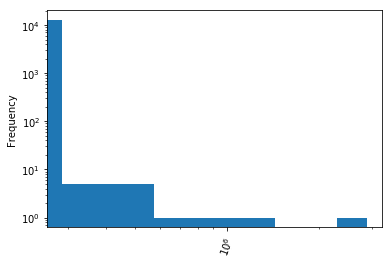

In [15]:
# Import matplotlib.pyplot
import matplotlib.pyplot as plt

# Plot the histogram
df['Existing Zoning Sqft'].plot(kind='hist', rot=70, logx=True, logy=True)

# Display the histogram
plt.show()

In [16]:
df['Existing Zoning Sqft'].describe()

count    1.284600e+04
mean     1.439973e+03
std      3.860757e+04
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      2.873107e+06
Name: Existing Zoning Sqft, dtype: float64

### Visualizing multiple variables with boxplots

In [18]:
df.columns

Index(['Job #', 'Doc #', 'Borough', 'House #', 'Street Name', 'Block', 'Lot',
       'Bin #', 'Job Type', 'Job Status', 'Job Status Descrp',
       'Latest Action Date', 'Building Type', 'Community - Board', 'Cluster',
       'Landmarked', 'Adult Estab', 'Loft Board', 'City Owned', 'Little e',
       'PC Filed', 'eFiling Filed', 'Plumbing', 'Mechanical', 'Boiler',
       'Fuel Burning', 'Fuel Storage', 'Standpipe', 'Sprinkler', 'Fire Alarm',
       'Equipment', 'Fire Suppression', 'Curb Cut', 'Other',
       'Other Description', 'Applicant's First Name', 'Applicant's Last Name',
       'Applicant Professional Title', 'Applicant License #',
       'Professional Cert', 'Pre- Filing Date', 'Paid', 'Fully Paid',
       'Assigned', 'Approved', 'Fully Permitted', 'Initial Cost',
       'Total Est. Fee', 'Fee Status', 'Existing Zoning Sqft',
       'Proposed Zoning Sqft', 'Horizontal Enlrgmt', 'Vertical Enlrgmt',
       'Enlargement SQ Footage', 'Street Frontage', 'ExistingNo. of Stories',
  

In [26]:
df['Initial Cost'].head()

0    $75000.00
1        $0.00
2    $30000.00
3     $1500.00
4    $19500.00
Name: Initial Cost, dtype: object

In [20]:
df['Initial Cost'].dtype

dtype('O')

TypeError: unsupported operand type(s) for /: 'str' and 'int'

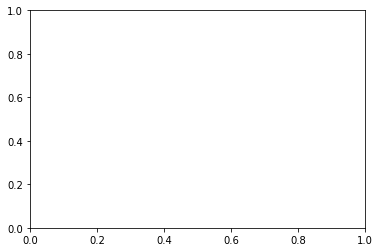

In [19]:
# Create the boxplot
df.boxplot(column='Initial Cost', by='Borough', rot=90)

# Display the plot
plt.show()

### Visualizing multiple variables with scatter plots

In [ ]:
# Import necessary modules
import pandas as pd
import matplotlib.pyplot as plt

# Create and display the first scatter plot
df.plot(kind='scatter', x='initial_cost', y='total_est_fee', rot=70, color='red')
plt.show()

# Create and display the second scatter plot
df_subset.plot(kind='scatter', x='initial_cost', y='total_est_fee', rot=70, color='green' )
plt.show()

## Tidying data for analysis

### Recognizing tidy data

For data to be tidy, it must have:

* Each variable as a separate column.
* Each row as a separate observation.

As a data scientist, you'll encounter data that is represented in a variety of different ways, so it is important to be able to recognize tidy (or untidy) data when you see it.

### Reshaping your data using melt

In [27]:
airquality = pd.read_csv('airquality.csv')
airquality.head()

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.0,190.0,7.4,67,5,1
1,36.0,118.0,8.0,72,5,2
2,12.0,149.0,12.6,74,5,3
3,18.0,313.0,11.5,62,5,4
4,NaN,NaN,14.3,56,5,5


In [28]:
# Melt airquality: airquality_melt
airquality_melt = pd.melt(airquality, id_vars=['Month', 'Day'])

# Print the head of airquality_melt
airquality_melt.head()

,Month,Day,variable,value
0,5,1,Ozone,41.0
1,5,2,Ozone,36.0
2,5,3,Ozone,12.0
3,5,4,Ozone,18.0
4,5,5,Ozone,NaN


### Customizing melted data

In [30]:
# Melt airquality: airquality_melt
airquality_melt = pd.melt(airquality, id_vars=['Month', 'Day'], var_name='measurement', value_name='reading')

# Print the head of airquality_melt
airquality_melt.head()

,Month,Day,measurement,reading
0,5,1,Ozone,41.0
1,5,2,Ozone,36.0
2,5,3,Ozone,12.0
3,5,4,Ozone,18.0
4,5,5,Ozone,NaN


### Pivot data
